# GET DATA

In [1]:
from visjobs.datas import get_data
from visjobs.visualize import draw_map
from visjobs.visualize import easy_plot
import numpy as np
import xarray as xr

In [2]:
data = get_data.pick_data(latest=True, hour='06', model='GFS', resolution=0.25)

In [3]:
time, dt_dict = get_data.pick_area(data, init_time=0 ,total_process=10, interval=1, 
                                       list_of_vars=['prmslmsl', 'tmpprs', 'hgtprs'],
                                       list_of_areas=['europe'],pr_height=[500])

In [4]:
pr = np.divide(dt_dict['europe'][0],100) #to hPa
temp = np.subtract(dt_dict['europe'][1],273.15) #DegreeC
hgt = dt_dict['europe'][2] # metres

In [5]:
lon = pr.lon[:].values
lat = pr.lat[:].values

# Do Visualize

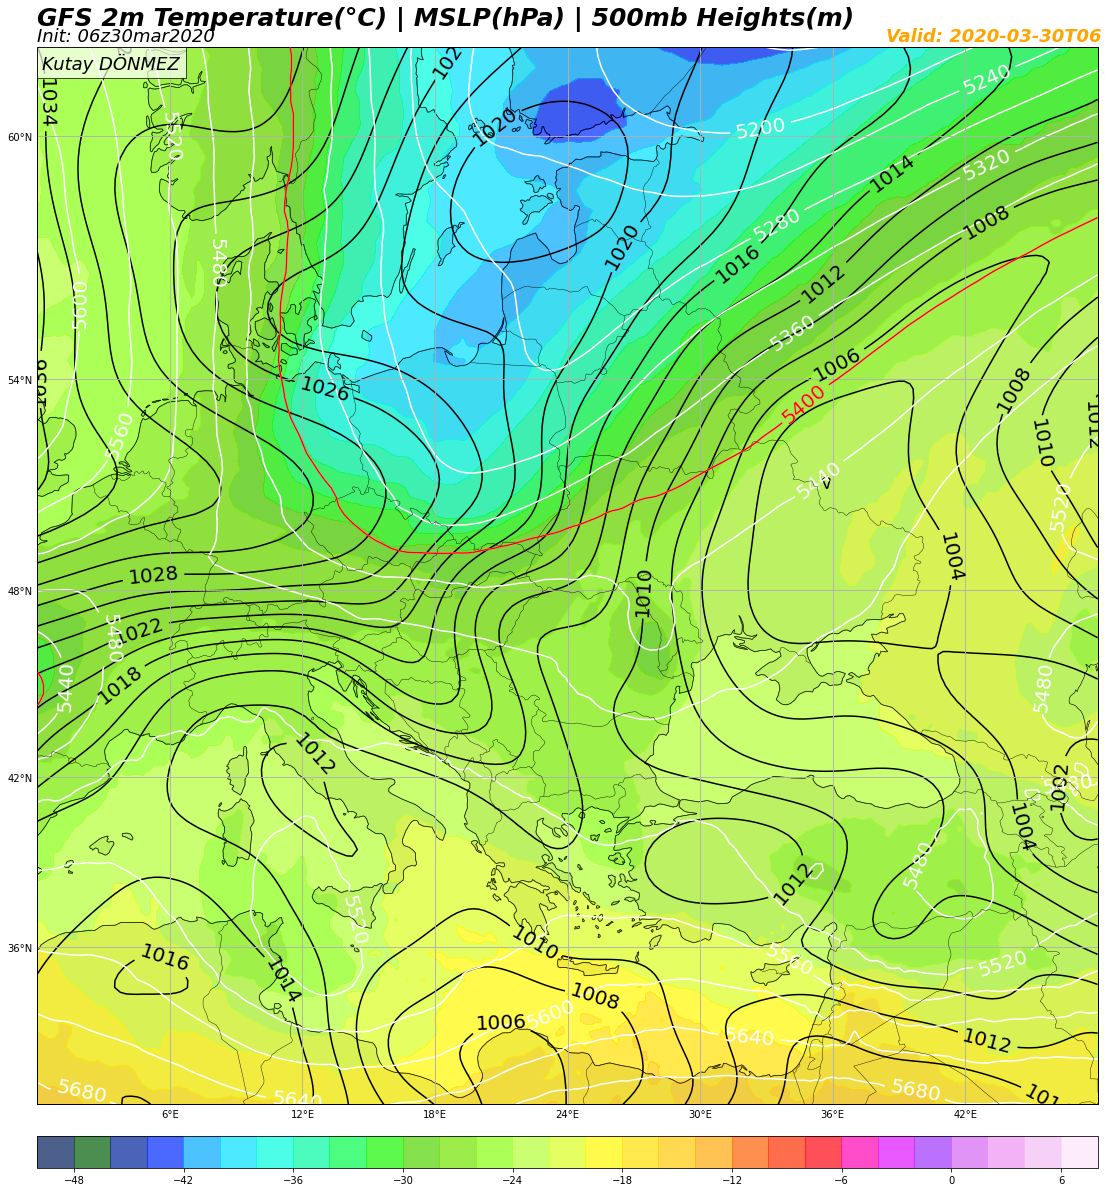

In [12]:
#enter class and make axis
m = easy_plot.painter()
ax = m.paint_ax(1,1,1, check_proj=True, proj='Mercator')

#set features
m.paint_borders(ax=ax, zorder=13)
m.paint_coastline(ax=ax)
m.paint_land(ax=ax, zorder=0)
m.paint_states(ax=ax, zorder=14)
m.paint_extent(ax=ax, lon_lat = [0,48,30,60])
m.set_size(19,21,ax=ax)
m.set_gridlines(ax=ax)
m.set_lonlat(ax=ax)

#Define arrays will be used
int_pr = m.set_arange(920,1060,2, method='arange')
int_temp = m.set_arange(-50,10,2, method='arange')
int_hgt = m.set_arange(4680,6121,40, method='arange')

#Make The press contour
mesh = m.plot_contour(lon, lat, pr[0,:,:], int_pr, colors='k',  ax=ax,  linewidths=0.9, transform='PlateCarree')
m.plot_clabel(mesh, fontsize=20, inline=1, inline_spacing=7,fmt='%i', rightside_up=True, use_clabeltext=True , ax=ax)

#make the height contour
meshs = m.plot_contour(lon, lat, hgt[0,:,:], int_hgt, colors='white', ax=ax,  linewidths=1.5, transform='PlateCarree')
m.plot_clabel(meshs, fontsize=20, inline=1, inline_spacing=7,fmt='%i', rightside_up=True, use_clabeltext=True , ax=ax)

#make the 540 height contour
mesh_540 = m.plot_contour(lon, lat, hgt[0,:,:], levels = [5400], colors=('r',), linewidths=(1.5,), 
               zorder=15, transform='PlateCarree', ax=ax)
m.plot_clabel(mesh_540, fontsize=20, inline=1, inline_spacing=7,fmt='%i', rightside_up=True, use_clabeltext=True , ax=ax)

#make the temp contourf
mesh_2 = m.plot_contourf(lon, lat, temp[0,:,:], int_temp, transform='PlateCarree', cmap='gist_ncar', alpha=0.7, ax=ax )
cb = m.plot_colorbar(mappable=mesh_2, location='bottom', pad='3%', ax=ax)

#make title
valid = temp['time'][0].values # buradaki time'da hata vericek sonra
valid = str(valid)[0:13]
init = str(temp['time'].attrs['grads_min'])

title1 = m.set_title(title='GFS 2m Temperature(°C) | MSLP(hPa) | 500mb Heights(m)',ax=ax, fontsize=25, 
                     weight='heavy',style='italic',transform=ax.transAxes)
title2 = m.set_title(title='Init: {}'.format(init),right=0, up=1.0050,ax=ax, fontsize=18,
                     style='italic', transform=ax.transAxes)
title3 = m.set_title(title='Valid: {}'.format(valid), right=0.800, up=1.0050, ax=ax, fontsize=18,
                     weight='heavy',style='italic', color='orange', transform=ax.transAxes)
title4 = m.set_title(title='Kutay DÖNMEZ', right=0.0047, up=0.97900, ax=ax, size=18,zorder=17,style='italic',transform=ax.transAxes,
    
                 bbox=dict(boxstyle="square",alpha=0.7,
                           ec='black',
                           fc='white',
                           ))



